In [39]:
import pandas as pd
import numpy as np
from itertools import product

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Parameters

In [2]:
FILE_LIST = ["EURJPY_5 Mins_Ask_2024.03.16_2025.03.16.csv", 
             "EURUSD_5 Mins_Ask_2024.03.16_2025.03.16.csv",
            "USDJPY_5 Mins_Ask_2024.03.16_2025.03.16.csv"]

DATA_FOLDER = "../../data/"

# Open DataSets

In [3]:
file_container: dict = {}

In [4]:
data_container: dict = {}
for file_name in FILE_LIST:
    currency = file_name[:6]
    print("Processing", currency)
    data_container[currency] = pd.read_csv(f"{DATA_FOLDER}{file_name}", parse_dates=True, index_col=0)
    
    

Processing EURJPY
Processing EURUSD
Processing USDJPY


## Calculate Returns

In [5]:
for currency, dataset in data_container.items():
    print(currency)
    dataset["return"] = dataset["Close"] - dataset["Open"]
    

EURJPY
EURUSD
USDJPY


<Axes: xlabel='Time (America/Buenos_Aires)'>

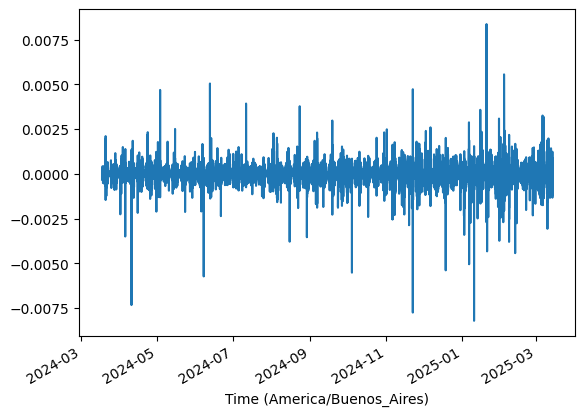

In [8]:
data_container["EURUSD"]["return"].plot()

# Prepare comparison dataset

In [16]:
df_comparison: pd.DataFrame = pd.DataFrame()

In [17]:
for currency, dataset in data_container.items():
    df_comparison[currency] = dataset["return"]

In [18]:
df_comparison

,EURJPY,EURUSD,USDJPY
Time (America/Buenos_Aires),,,
2024-03-17 18:00:00,-0.005,-0.00031,-0.004
2024-03-17 18:05:00,-0.077,0.00000,0.013
2024-03-17 18:10:00,-0.042,-0.00016,0.010
2024-03-17 18:15:00,0.015,-0.00003,0.007
2024-03-17 18:20:00,0.121,0.00020,0.105
...,...,...,...
2025-03-14 17:35:00,-0.002,0.00017,-0.026
2025-03-14 17:40:00,-0.038,-0.00011,-0.010
2025-03-14 17:45:00,-0.009,0.00002,-0.019


In [42]:
collect_t: list = []
collect_t_p_1: list = []
for currency in data_container.keys():
    collect_t.append(currency)
    collect_t_p_1.append(f"{currency}_t+1")
    df_comparison[f"{currency}_t+1"] = df_comparison[currency].shift(-1)

pairwise_instruments = list(product(collect_t, collect_t_p_1))

In [37]:
df_comparison.head()

,EURJPY,EURUSD,USDJPY,EURJPY_t+1,EURUSD_t+1,USDJPY_t+1
Time (America/Buenos_Aires),,,,,,
2024-03-17 18:00:00,-0.005,-0.00031,-0.004,-0.077,0.00000,0.013
2024-03-17 18:05:00,-0.077,0.00000,0.013,-0.042,-0.00016,0.010
2024-03-17 18:10:00,-0.042,-0.00016,0.010,0.015,-0.00003,0.007
2024-03-17 18:15:00,0.015,-0.00003,0.007,0.121,0.00020,0.105
2024-03-17 18:20:00,0.121,0.00020,0.105,-0.015,0.00010,-0.065


pearson


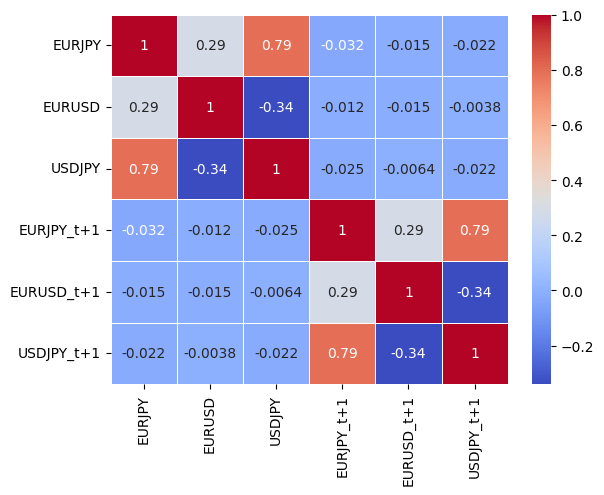

kendall


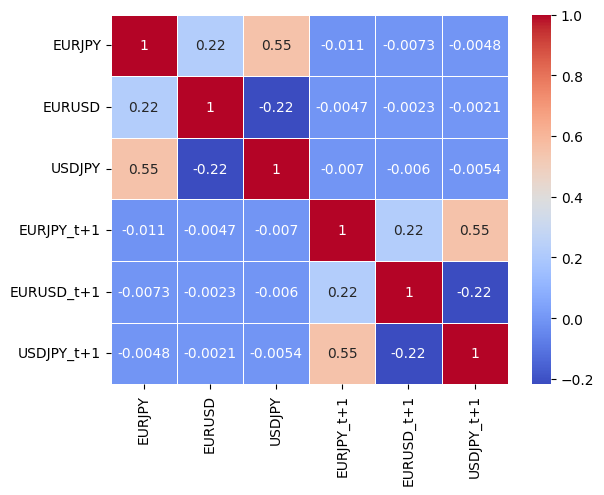

spearman


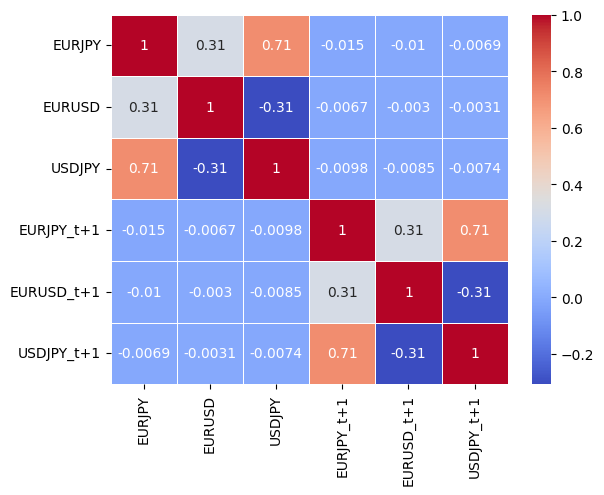

In [35]:
methods:list = ["pearson", "kendall", "spearman"]

for method in methods:
    correl_matrix = df_comparison.corr(method=method)
    # Draw the heatmap
    print(method)
    sns.heatmap(correl_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.show()

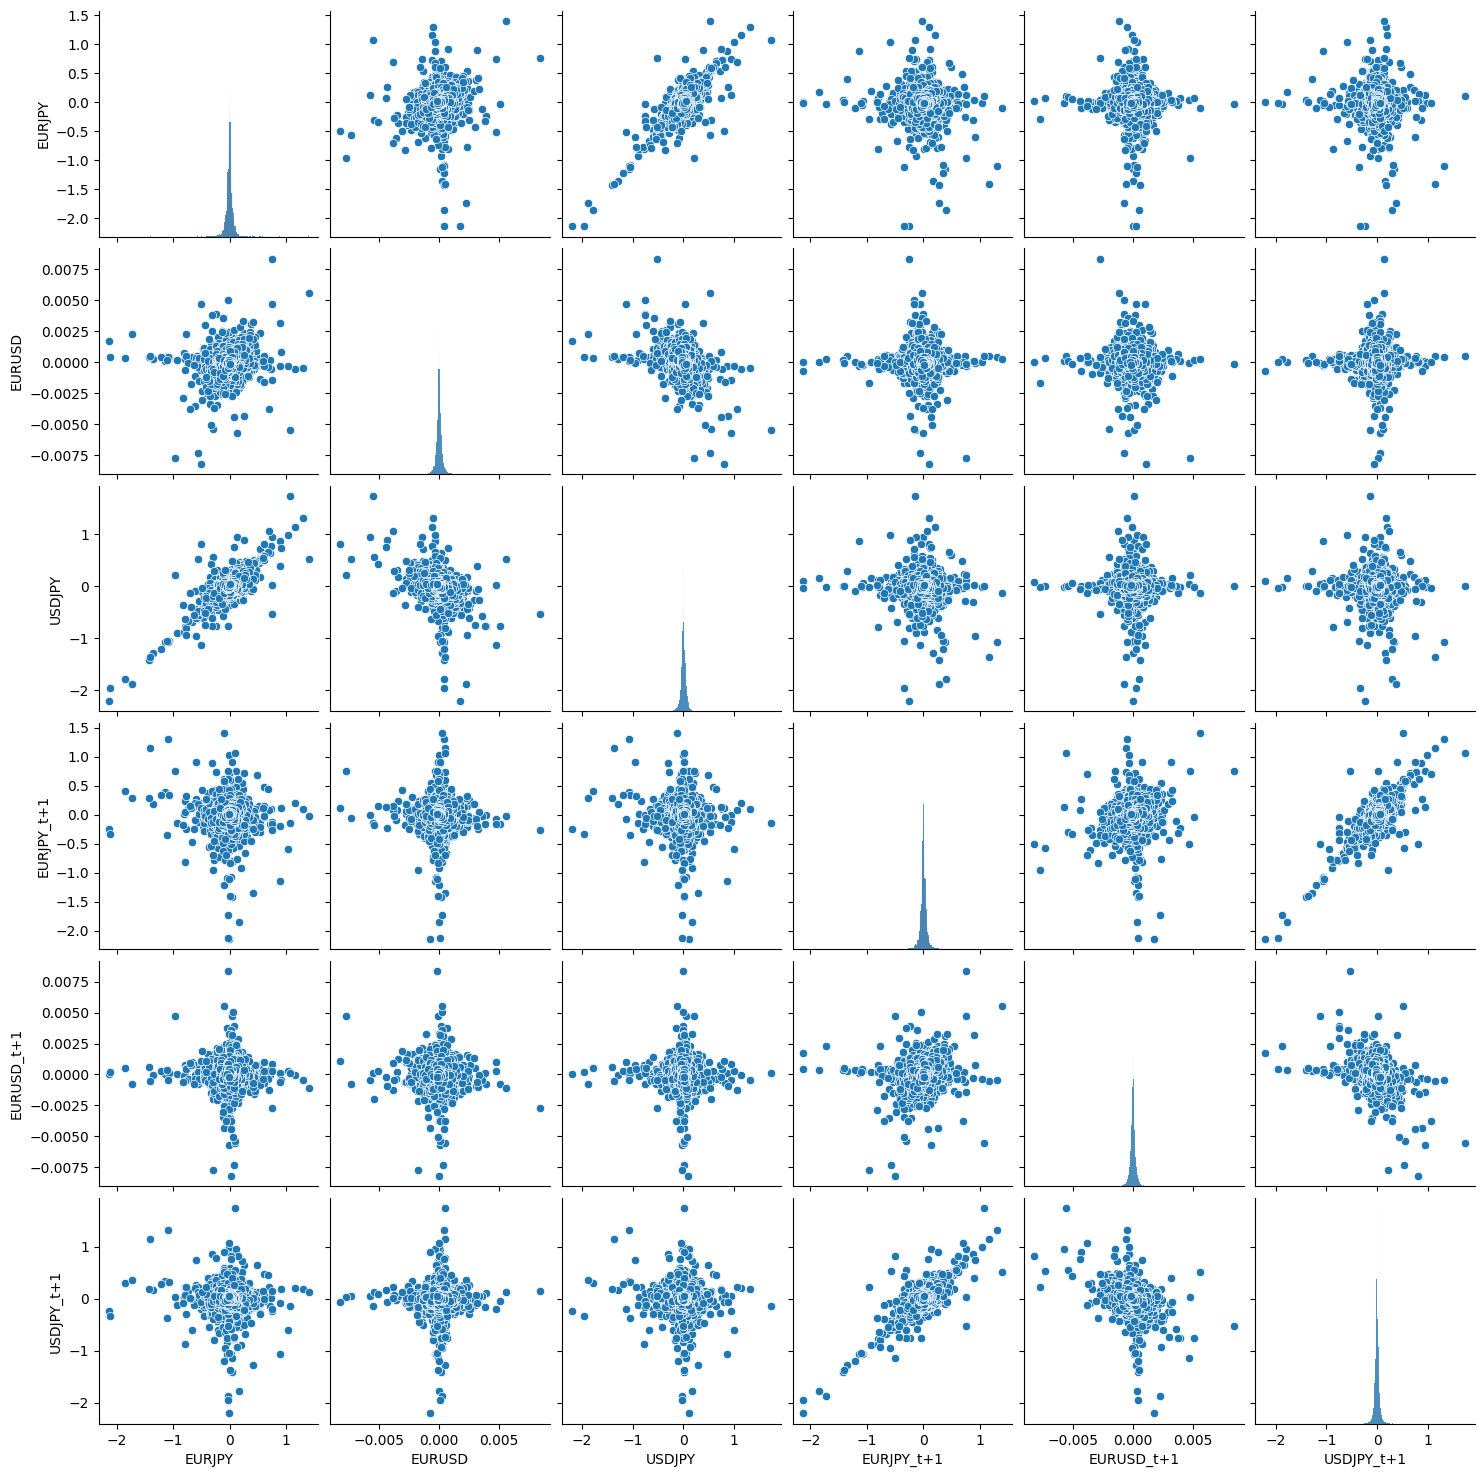

In [30]:
sns.pairplot(df_comparison)
plt.show()

# Rolling Window Correlation

In [ ]:
pairwise_columns: list = []
for pair in pairwise_instruments:
    print(pair)
    column_name = f"{pair[0]}-{pair[1]}"
    pairwise_columns.append(column_name)
    df_comparison[f"{pair[0]}-{pair[1]}"] = df_comparison[pair[0]].rolling(12).corr(df_comparison[pair[1]])

In [51]:
df_comparison.head()

,EURJPY,EURUSD,USDJPY,EURJPY_t+1,EURUSD_t+1,USDJPY_t+1,EURJPY-EURJPY_t+1,EURJPY-EURUSD_t+1,EURJPY-USDJPY_t+1,EURUSD-EURJPY_t+1,EURUSD-EURUSD_t+1,EURUSD-USDJPY_t+1,USDJPY-EURJPY_t+1,USDJPY-EURUSD_t+1,USDJPY-USDJPY_t+1
Time (America/Buenos_Aires),,,,,,,,,,,,,,,
2024-03-17 18:00:00,-0.005,-0.00031,-0.004,-0.077,0.00000,0.013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-17 18:05:00,-0.077,0.00000,0.013,-0.042,-0.00016,0.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-17 18:10:00,-0.042,-0.00016,0.010,0.015,-0.00003,0.007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-17 18:15:00,0.015,-0.00003,0.007,0.121,0.00020,0.105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-17 18:20:00,0.121,0.00020,0.105,-0.015,0.00010,-0.065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


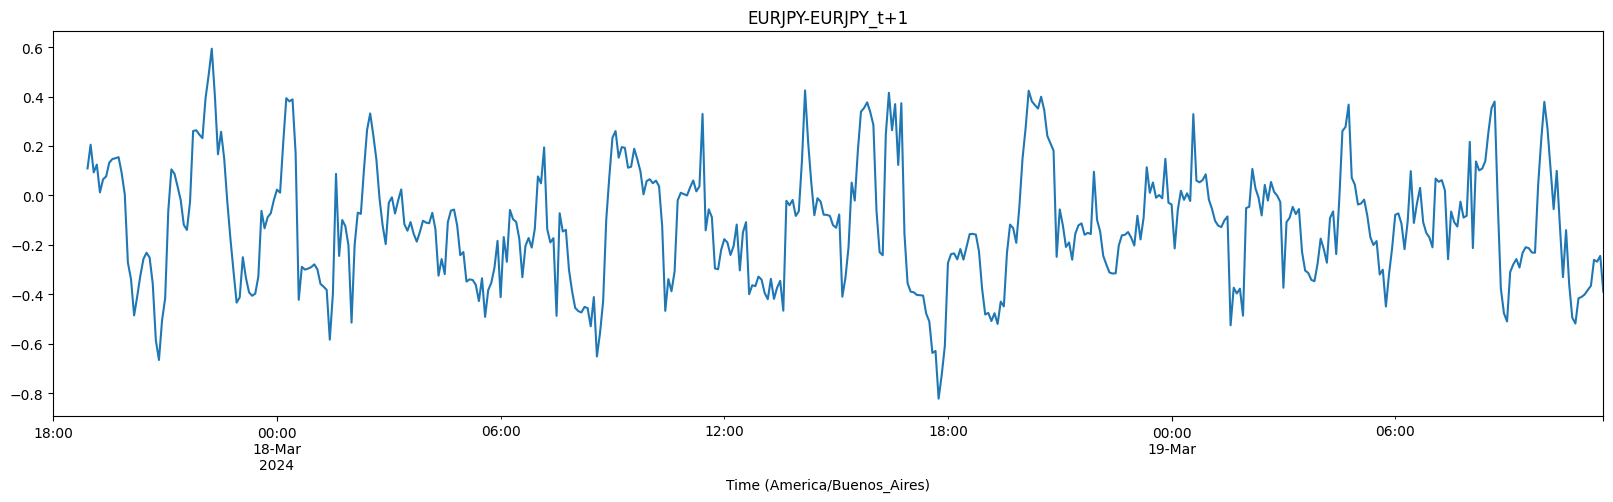

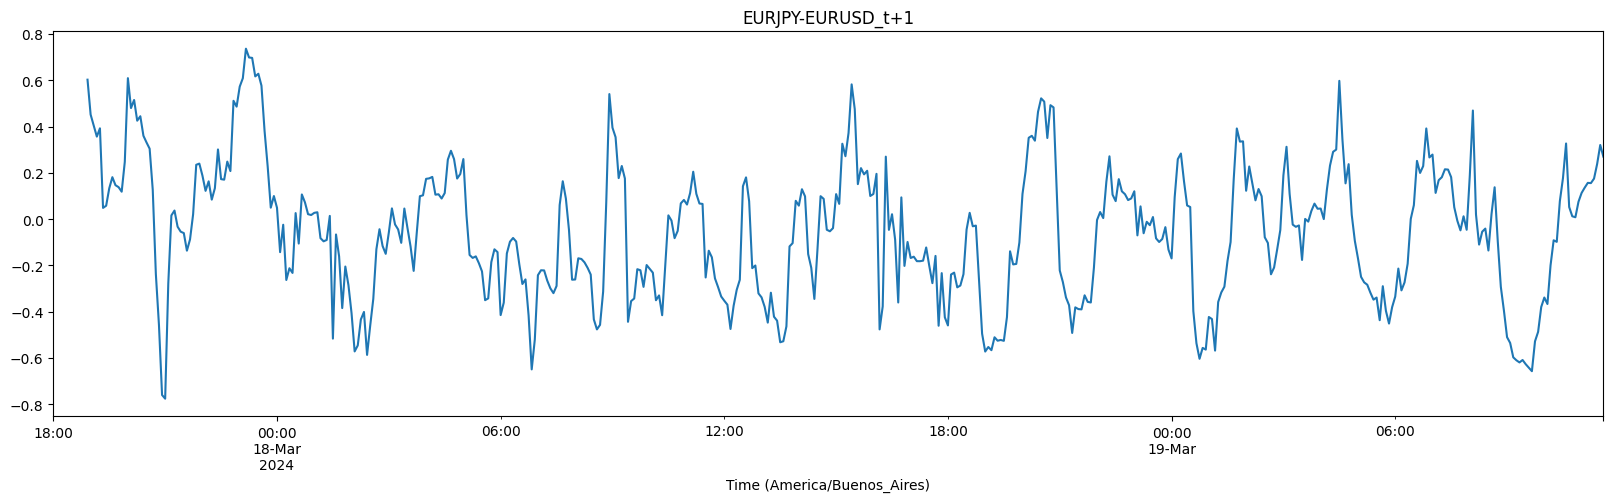

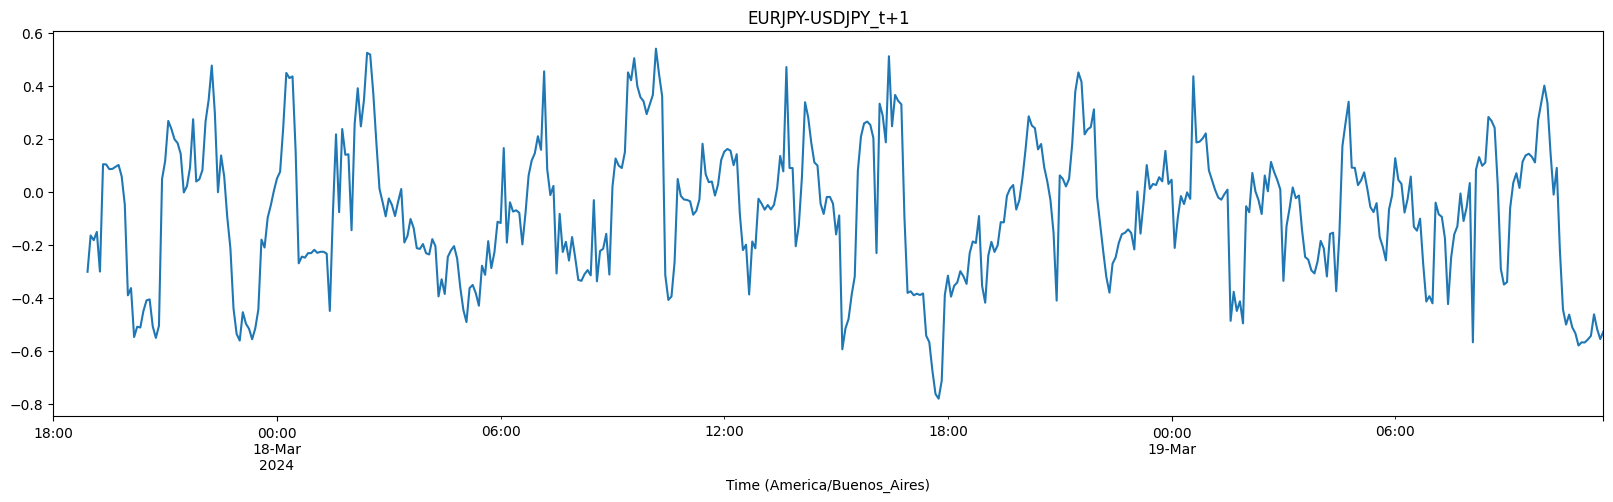

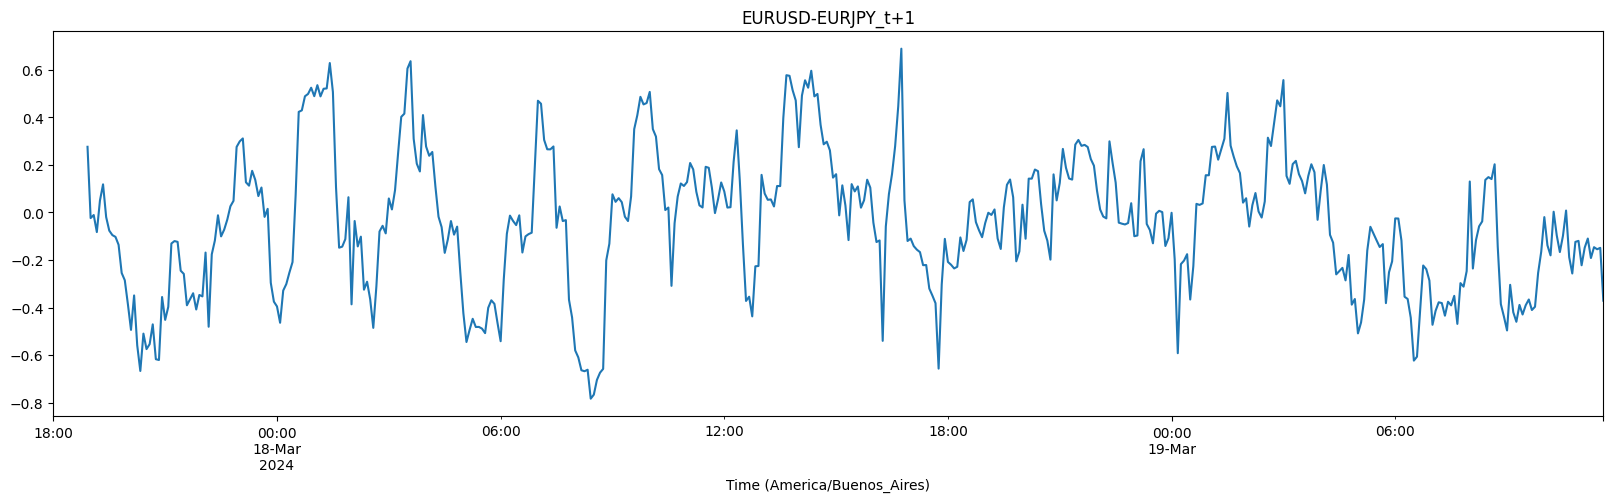

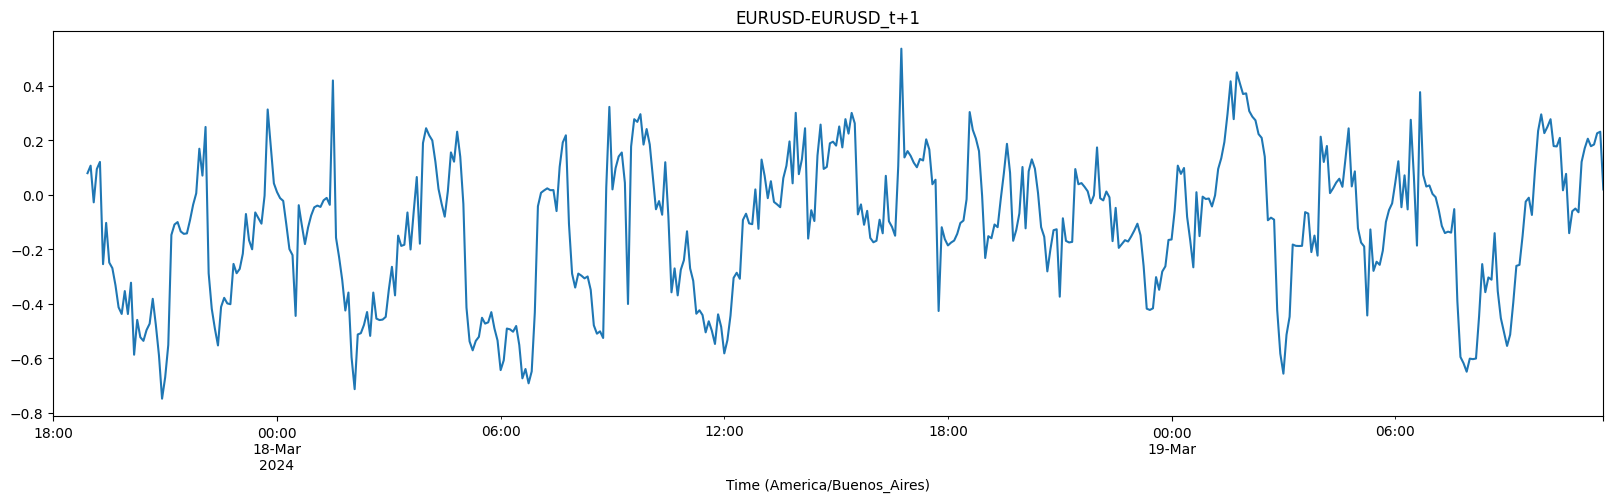

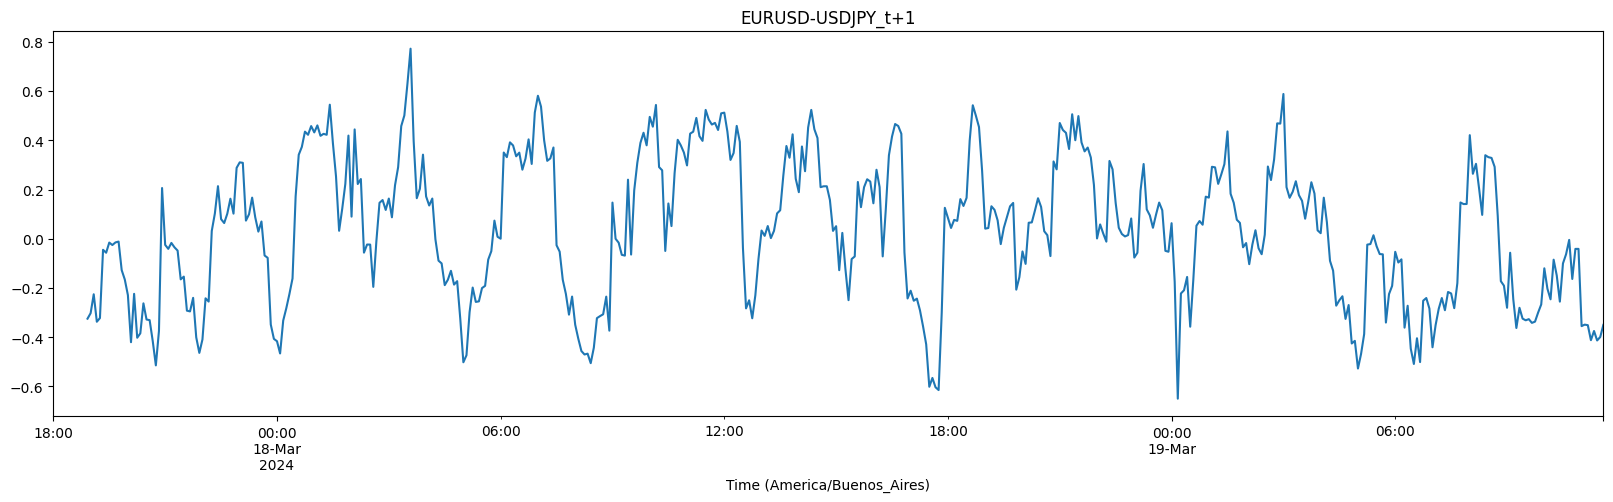

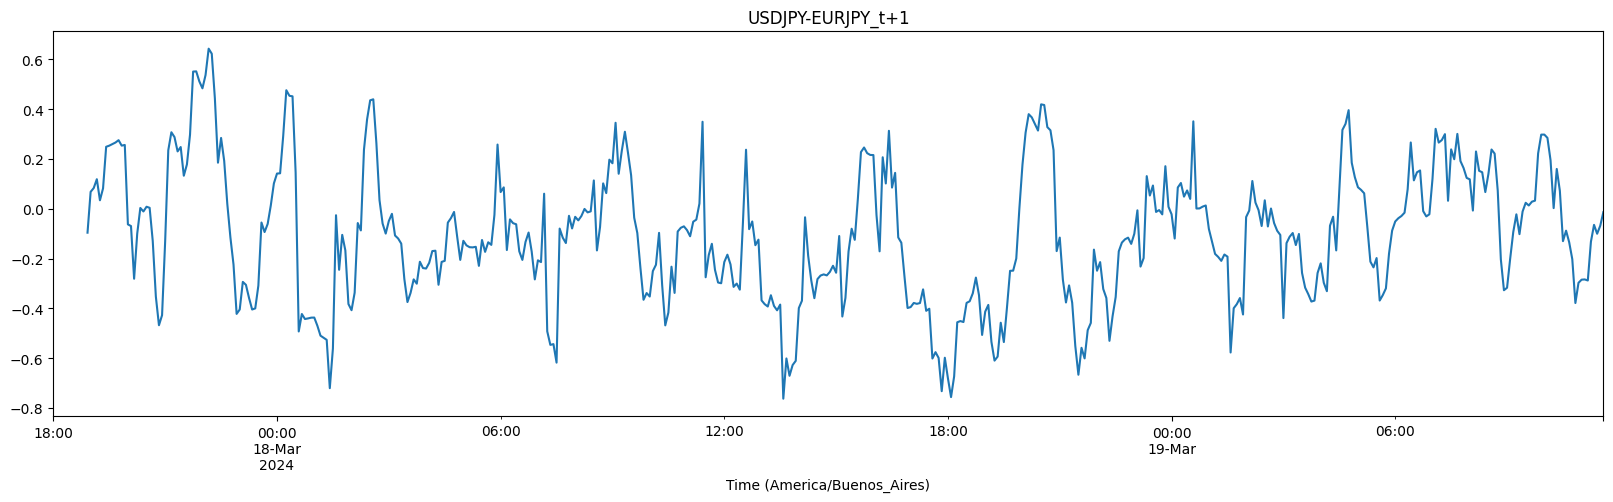

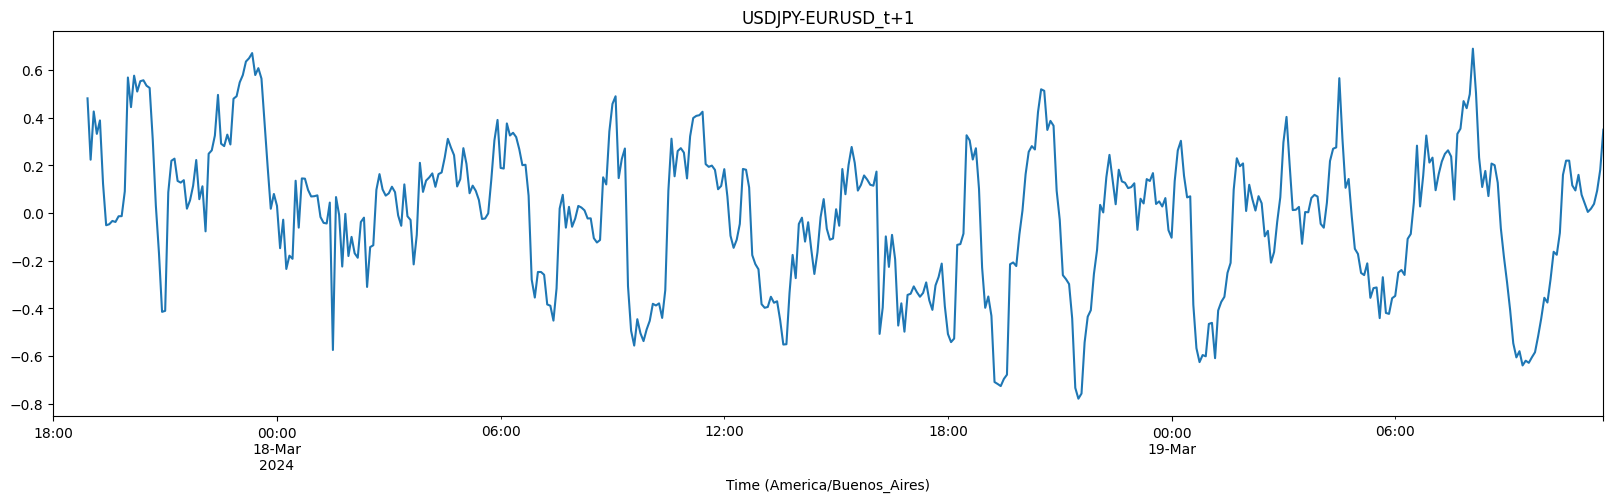

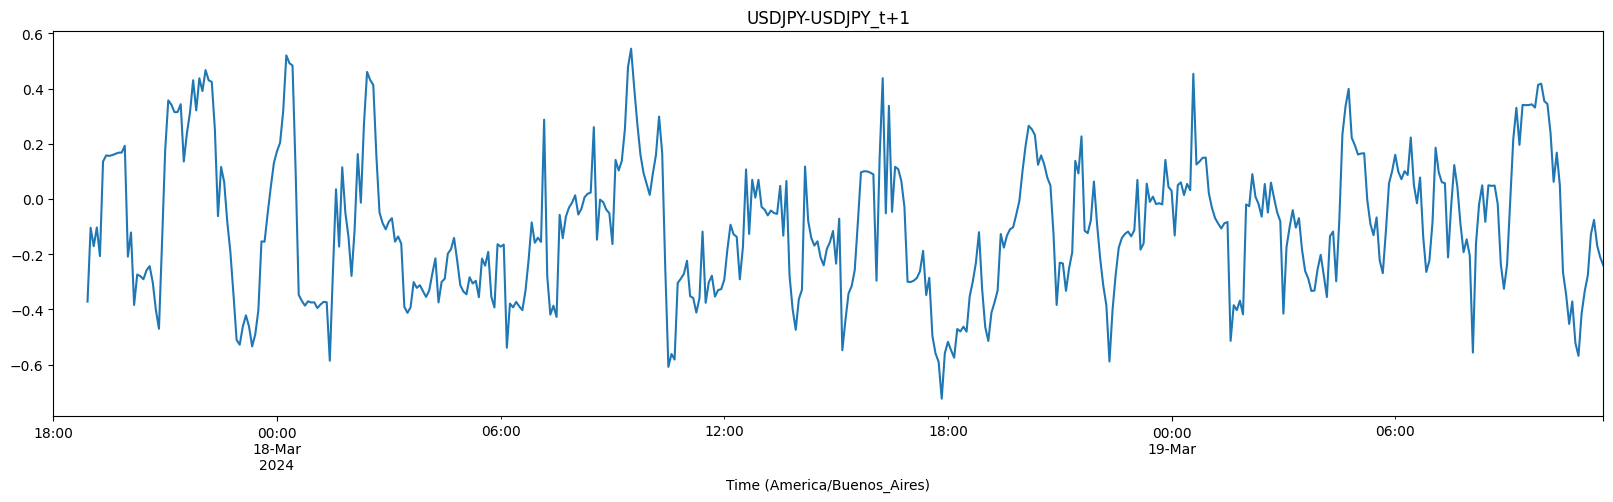

In [65]:
for pair in pairwise_columns:
    df_comparison[pair][0:500].plot(figsize=(20, 5), title=pair)
    plt.show()

# Observations Conclusions

Aftter this exploratory analysis, we cannot observe any correlation between values from periods $t$ and values from period $t+1$, at least for the instruments EURUSD, USDJPY and EURJPY